<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1472/1774380008.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='viridis')


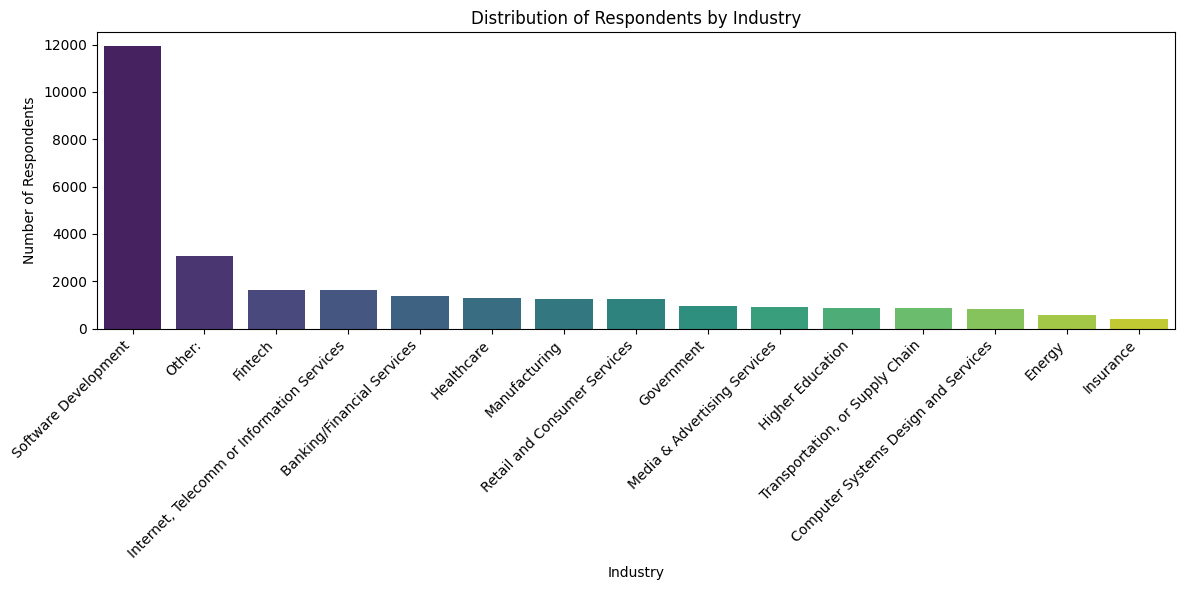

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 2: Plot the Distribution of Industry
# Check the columns to find the exact column name for 'Industry'
df.columns

# Assuming 'Industry' is the column name for industry (adjust if necessary)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Industry', order=df['Industry'].value_counts().index, palette='viridis')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
##Write your code here
import pandas as pd

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 3: Identify High Compensation Outliers

# Check if 'ConvertedCompYearly' is present in the dataset
df.columns

# Calculate basic statistics for ConvertedCompYearly
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

# Display the statistics
print(f"Mean Compensation: ${mean_comp:,.2f}")
print(f"Median Compensation: ${median_comp:,.2f}")
print(f"Standard Deviation of Compensation: ${std_comp:,.2f}")

# Define outlier threshold (3 standard deviations above the mean)
threshold = mean_comp + (3 * std_comp)

# Identify respondents with compensation exceeding the threshold
outliers = df[df['ConvertedCompYearly'] > threshold]

# Display the outliers
print(f"\nNumber of respondents with high compensation (outliers): {outliers.shape[0]}")
print("Outliers:")
print(outliers[['ConvertedCompYearly']].head())


Mean Compensation: $86,155.29
Median Compensation: $65,000.00
Standard Deviation of Compensation: $186,756.97

Number of respondents with high compensation (outliers): 89
Outliers:
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers using IQR method: 978


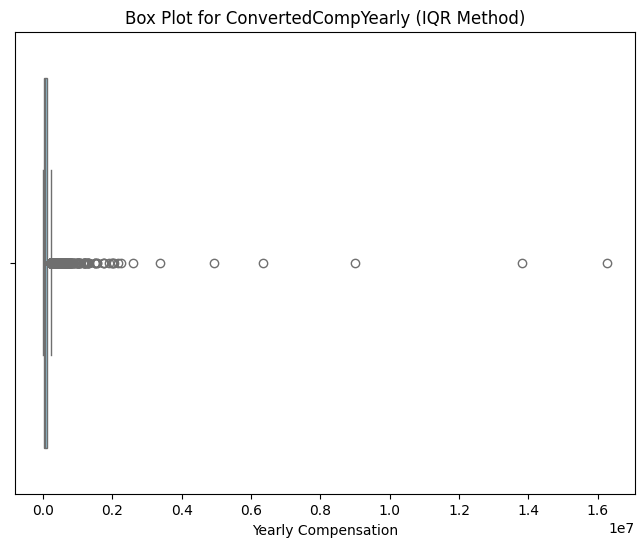

In [6]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 4: Detect Outliers in Compensation (IQR method)

# Calculate the IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers based on the IQR method
outliers_iqr = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Display the count of outliers
print(f"Number of outliers using IQR method: {outliers_iqr.shape[0]}")

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='ConvertedCompYearly', color='skyblue')
plt.title('Box Plot for ConvertedCompYearly (IQR Method)')
plt.xlabel('Yearly Compensation')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
##Write your code here
import pandas as pd

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Step 5: Remove Outliers and Create a New DataFrame

# Calculate the IQR for ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape}")
print(f"New DataFrame size (after removing outliers): {df_no_outliers.shape}")


Original DataFrame size: (65437, 114)
New DataFrame size (after removing outliers): (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [20]:
import re
import pandas as pd

def map_age_to_numeric(age_str):
    # Handle NaN or empty values
    if pd.isnull(age_str):
        return None
    
    # Handle "Under 18 years old"
    if isinstance(age_str, str) and 'Under 18' in age_str:
        return 18  # Assign a value of 18 or a value that makes sense
    
    # Handle "Prefer not to say" or similar values
    if isinstance(age_str, str) and 'Prefer not to say' in age_str:
        return None  # or choose to return a specific value, e.g., NaN

    # Handle "65 years or older" (you can decide to return 70 or 65)
    if isinstance(age_str, str) and '65 years or older' in age_str:
        return 70  # You can adjust this to any age estimate

    # If the age is in a range format like '20-30', return the midpoint
    if isinstance(age_str, str) and '-' in age_str:
        # Clean up the string and extract numeric values
        age_range = re.findall(r'\d+', age_str)  # Find all numbers in the string
        if len(age_range) == 2:
            return (int(age_range[0]) + int(age_range[1])) / 2  # Return the average of the two numbers
        else:
            print(f"Error with range: {age_str}")  # Debugging print
            return None  # If there's a conversion error, return None
    
    # If the age is a specific number with a 'years old' suffix, extract the number
    elif isinstance(age_str, str):
        # Extract the numeric part using regex and remove any non-numeric characters
        match = re.search(r'\d+', age_str)  # Find one or more digits
        if match:
            return int(match.group(0))  # Extract the first number found
        else:
            print(f"Regex did not match: {age_str}")  # Debugging print
    
    return None  # If all conditions fail, return None

# Example DataFrame for testing
data = {'Age': ['35-44 years old', '45-54 years old', 'Under 18 years old', '18-24 years old', 'Prefer not to say']}
df = pd.DataFrame(data)

# Apply the transformation
df['Age_numeric'] = df['Age'].apply(map_age_to_numeric)

# Check the number of nulls after mapping
print(f"Null values in 'Age_numeric': {df['Age_numeric'].isnull().sum()}")

# Print out a few samples of rows that resulted in nulls for inspection
print(df[df['Age_numeric'].isnull()]['Age'].head(10))

# Print the transformed DataFrame
print(df)


Null values in 'Age_numeric': 1
4    Prefer not to say
Name: Age, dtype: object
                  Age  Age_numeric
0     35-44 years old         39.5
1     45-54 years old         49.5
2  Under 18 years old         18.0
3     18-24 years old         21.0
4   Prefer not to say          NaN


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
